This chunck of code is intended to do analysis on four objects: comments, subreddits, threads and users. I don't expect pretty figures, but I do expect several things:

### 1. For each object, at least one interesting pattern is found;
### 2. One intersaction relationship among those objects;
### 3. Dig into one of those above findings.

More details should be expected below

### Results:

Expecting entries later...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats.stats import pearsonr

In [3]:
from scipy.stats import spearmanr

In [4]:
SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### import data

In [5]:
data_dir = '../data/'
user_data = '../data/user_eda_data.tsv'
thread_data = '../data/thread_eda_data.tsv'
comment_data = '../data/comment_eda_data.tsv'
subreddit_data = '../data/subreddit_eda_data.tsv'

## 1. Subreddit data analysis

In [6]:
subreddit_df = pd.read_csv(subreddit_data, sep='\t')
subreddit_df = subreddit_df.set_index('subreddit')

In [7]:
subreddit_df

,2011-01_num_comment,2011-01_num_thread,2011-01_num_unique_user,2011-01_num_user,2011-02_num_comment,2011-02_num_thread,2011-02_num_unique_user,2011-02_num_user,2011-03_num_comment,2011-03_num_thread,...,2017-06_num_unique_user,2017-06_num_user,2017-07_num_comment,2017-07_num_thread,2017-07_num_unique_user,2017-07_num_user,2017-08_num_comment,2017-08_num_thread,2017-08_num_unique_user,2017-08_num_user
subreddit,,,,,,,,,,,,,,,,,,,,,
CryptoCurrency,0,0,0,0,0,0,0,0,0,0,...,8124,45277,43795,3705,6243,43795,75989,6347,10624,75989
CryptoMarkets,0,0,0,0,0,0,0,0,0,0,...,2124,6883,5794,786,1714,5794,9389,1137,2753,9389
Monero,0,0,0,0,0,0,0,0,0,0,...,1399,10639,8397,707,1335,8397,16757,1438,2469,16757
NEO,0,0,0,0,0,0,0,0,0,0,...,0,0,5279,357,984,5279,70864,3136,6271,70864
BlockChain,0,0,0,0,0,0,0,0,0,0,...,142,232,316,102,176,316,392,145,198,392
btc,0,0,0,0,0,0,0,0,0,0,...,4343,48065,58678,2902,4498,58678,146493,8008,8651,146493
BitcoinMarkets,0,0,0,0,0,0,0,0,0,0,...,2811,23833,22479,518,2488,22479,41565,777,3924,41565
Bitcoin,58,12,24,58,67,20,33,67,392,44,...,13902,117596,124201,8706,15088,124201,199417,13076,21465,199417
Ripple,0,0,0,0,0,0,0,0,0,0,...,1739,9351,7713,671,1372,7713,14683,1164,2433,14683


### (1) plot on number of comments (num_comment) 
1. Similar subreddits: 
    1. CryptoCurrency and CryptoMarkets: small bumps in early 2014 and steady rise from 2017
    2. Monero, BlockChain, btc: start to grow from late 2015, high rise from mid 2017
    3. NEO, Ripple: sharp rise from 2017
    4. BitcoinMarkets and Bitcoin: high volumes from 2013
2. “Bitcoin” is definitely THE world in cryptocurrency domain and “blockchain” seems to be less concerned and never came to a burst point. It might because of the technical nature of blockchain: it is gold mine for companies but not really into general people. This also leads to a thought: the dominated topic discussed in crypto-currency domain is about investment and money(Wish to be confirmed by topic model)

In [9]:
comment_col_names = [c for c in list(subreddit_df) if '_num_comment' in c]
subr_comment_df = subreddit_df[comment_col_names]
subr_comment_df = subr_comment_df.rename(columns={c: c[:c.index('_')] for c in subr_comment_df.columns})
subr_comment_df = subr_comment_df.transpose()
subr_comment_df.index = pd.to_datetime(subr_comment_df.index, format='%Y-%m')
subr_comment_df

subreddit,CryptoCurrency,CryptoMarkets,Monero,NEO,BlockChain,btc,BitcoinMarkets,Bitcoin,Ripple
2011-01-01,0,0,0,0,0,0,0,58,0
2011-02-01,0,0,0,0,0,0,0,67,0
2011-03-01,0,0,0,0,0,0,0,392,0
2011-04-01,0,0,0,0,0,0,0,678,0
2011-05-01,0,0,0,0,0,0,0,5802,0
2011-06-01,0,0,0,0,0,0,0,24089,0
2011-07-01,0,0,0,0,0,0,0,6937,0
2011-08-01,0,0,0,0,0,0,0,5339,0
2011-09-01,0,0,0,0,0,0,0,4933,0
2011-10-01,0,0,0,0,0,0,0,3771,0


In [83]:
subr_comment_df.describe()

subreddit,CryptoCurrency,CryptoMarkets,Monero,NEO,BlockChain,btc,BitcoinMarkets,Bitcoin,Ripple
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3769.887500,506.287500,1935.862500,952.000000,30.325000,11089.825000,9466.512500,73949.687500,796.462500
std,11010.185082,1519.964675,3676.111597,7937.309875,68.131811,23038.344761,9814.854944,64266.286583,3179.358342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8451.250000,0.000000
50%,1068.000000,33.000000,51.500000,0.000000,0.000000,0.000000,7902.500000,65600.500000,59.000000
75%,2119.000000,110.000000,1431.250000,0.000000,21.250000,18119.250000,16877.750000,112236.250000,146.750000
max,75989.000000,9389.000000,16757.000000,70864.000000,392.000000,146493.000000,41565.000000,240358.000000,21718.000000


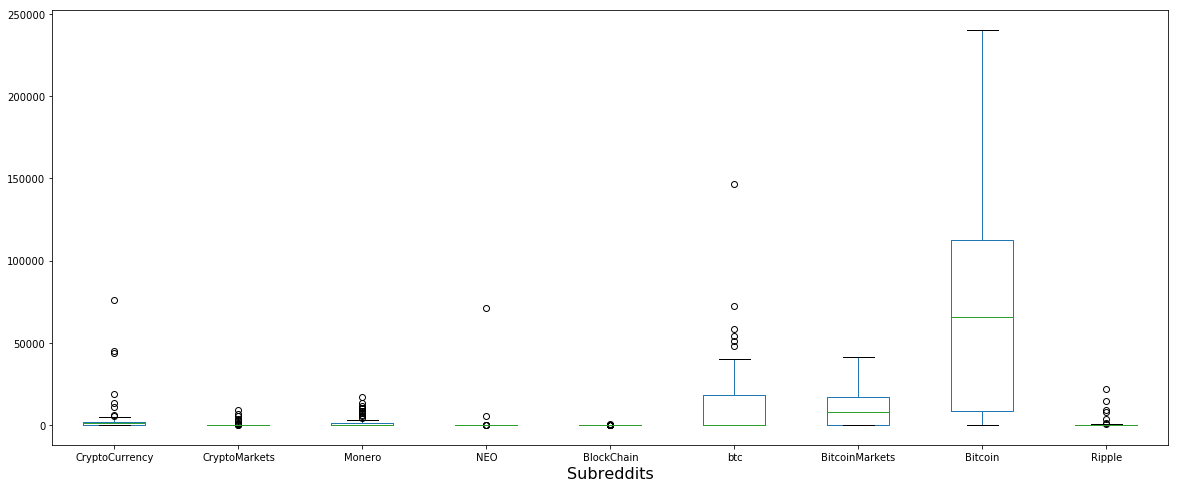

In [17]:
df = subr_comment_df

fig = plt.figure()
df.plot(kind='box', figsize=(20,8))
# fig.suptitle('test title', fontsize=20)
plt.xlabel('Subreddits')
# plt.title('Number of Comments from Jan-2011 to Aug-2017')
plt.savefig('./fig/number of comment per subreddit.jpg')
# fig.show()


# plt.plot(data)
# fig.suptitle('test title', fontsize=20)
# plt.xlabel('xlabel', fontsize=18)
# plt.ylabel('ylabel', fontsize=16)
# fig.savefig('test.jpg')

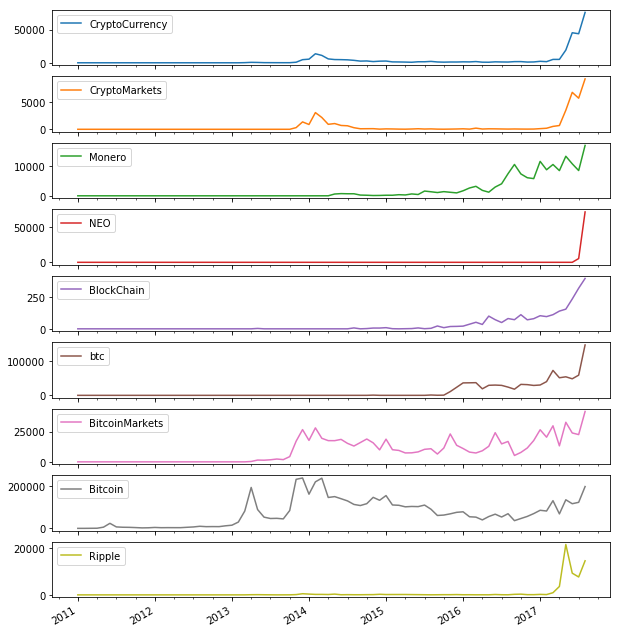

In [18]:
df = subr_comment_df

plt.figure()
df.plot(subplots=True, figsize=(10, 12))
plt.legend(loc='best')
plt.savefig('number of comments per subreddit-line.jpg')

### Target on column: BlockChain
Note: first comment in BlockChain is 2013-05-01

In [20]:
blockchain = subr_comment_df.loc['20130501':, 'BlockChain']
# blockchain


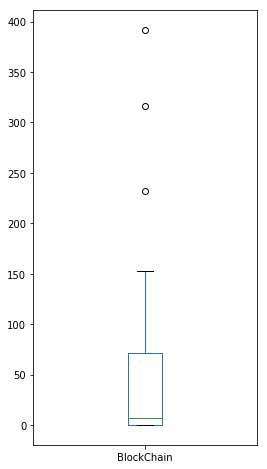

In [24]:
blockchain.plot.box(return_type='axes', figsize=(4,8))
plt.savefig('./fig/num of comment in BlockChain.jpg')

### (2) plot on number of threads (num_thread) 

In [26]:
thread_col_names = [c for c in list(subreddit_df) if '_num_thread' in c]
thread_df = subreddit_df[thread_col_names]
thread_df = thread_df.rename(columns={c: c[:c.index('_')] for c in thread_df.columns})
thread_df = thread_df.transpose()
thread_df.index = pd.to_datetime(thread_df.index, format='%Y-%m')
thread_df

subreddit,CryptoCurrency,CryptoMarkets,Monero,NEO,BlockChain,btc,BitcoinMarkets,Bitcoin,Ripple
2011-01-01,0,0,0,0,0,0,0,12,0
2011-02-01,0,0,0,0,0,0,0,20,0
2011-03-01,0,0,0,0,0,0,0,44,0
2011-04-01,0,0,0,0,0,0,0,61,0
2011-05-01,0,0,0,0,0,0,0,425,0
2011-06-01,0,0,0,0,0,0,0,1531,0
2011-07-01,0,0,0,0,0,0,0,527,0
2011-08-01,0,0,0,0,0,0,0,413,0
2011-09-01,0,0,0,0,0,0,0,365,0
2011-10-01,0,0,0,0,0,0,0,318,0


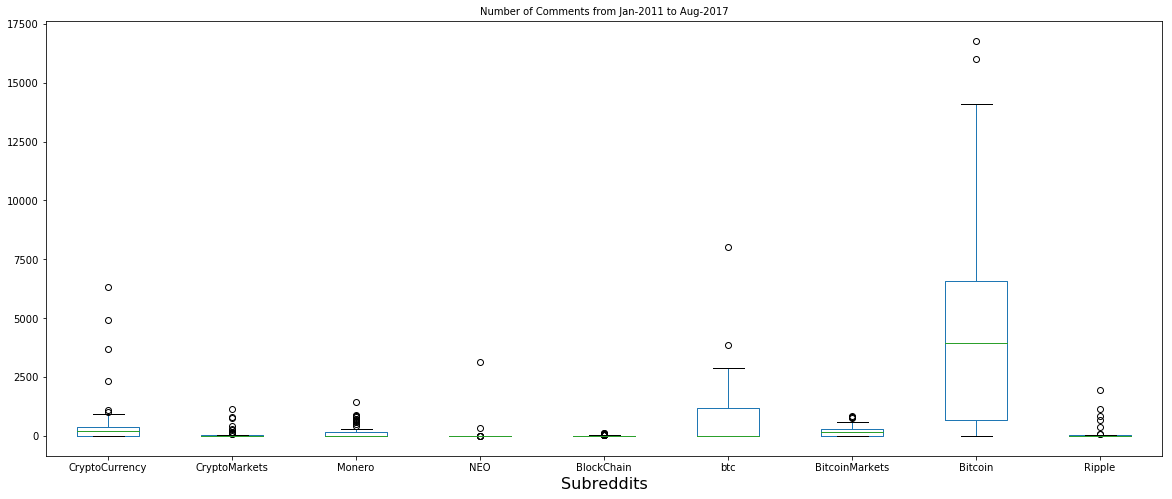

In [27]:
df = thread_df

fig = plt.figure()
df.plot(kind='box', figsize=(20,8))
# fig.suptitle('test title', fontsize=20)
plt.xlabel('Subreddits')
plt.title('Number of Comments from Jan-2011 to Aug-2017')

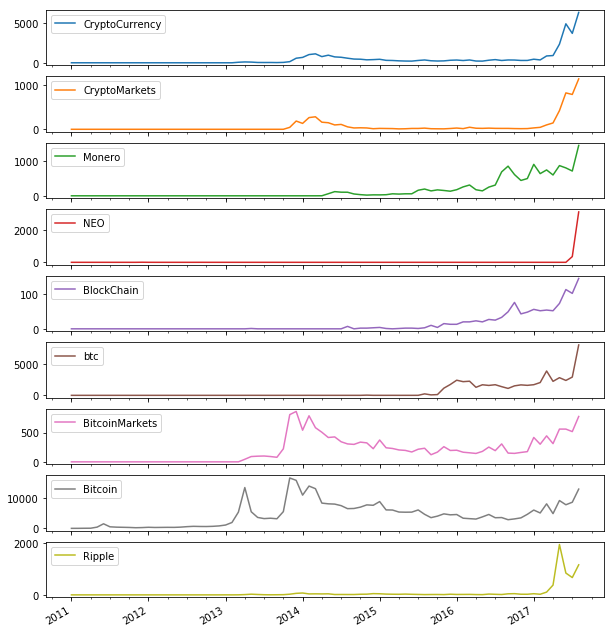

In [28]:
df = thread_df

plt.figure()
df.plot(subplots=True, figsize=(10, 12))
plt.legend(loc='best')

### (3) plot on number of users (num_user) 

In [29]:
user_col_names = [c for c in list(subreddit_df) if '_num_unique_user' in c]
user_df = subreddit_df[user_col_names]
user_df = user_df.rename(columns={c: c[:c.index('_')] for c in user_df.columns})
user_df = user_df.transpose()
user_df.index = pd.to_datetime(user_df.index, format='%Y-%m')
user_df

subreddit,CryptoCurrency,CryptoMarkets,Monero,NEO,BlockChain,btc,BitcoinMarkets,Bitcoin,Ripple
2011-01-01,0,0,0,0,0,0,0,24,0
2011-02-01,0,0,0,0,0,0,0,33,0
2011-03-01,0,0,0,0,0,0,0,107,0
2011-04-01,0,0,0,0,0,0,0,153,0
2011-05-01,0,0,0,0,0,0,0,699,0
2011-06-01,0,0,0,0,0,0,0,2192,0
2011-07-01,0,0,0,0,0,0,0,1059,0
2011-08-01,0,0,0,0,0,0,0,912,0
2011-09-01,0,0,0,0,0,0,0,808,0
2011-10-01,0,0,0,0,0,0,0,675,0


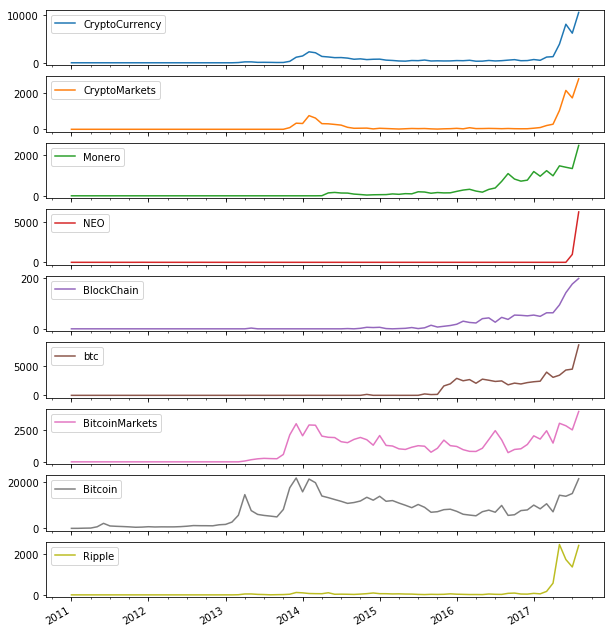

In [30]:
df = user_df

plt.figure()
df.plot(subplots=True, figsize=(10, 12))
plt.legend(loc='best')

### (4) plot on relationship between users and threads

In each subreddit, number of users and number of threads are significantly correlated.

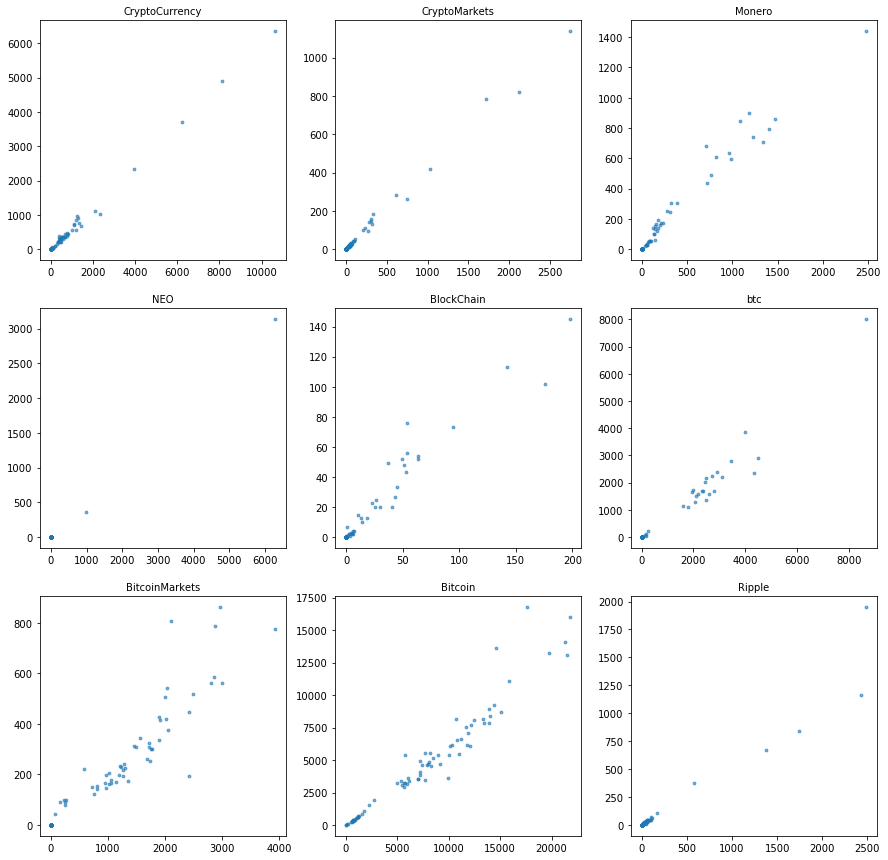

In [39]:
# fig, axes = plt.subplots(nrows=3, ncols=3)
plt.figure(figsize=(15, 15))
plt.subplot(331)
plt.scatter(user_df['CryptoCurrency'], thread_df['CryptoCurrency'], s=8, alpha=0.6)
plt.title('CryptoCurrency')

plt.subplot(332)
plt.scatter(user_df['CryptoMarkets'], thread_df['CryptoMarkets'], s=8, alpha=0.6)
plt.title('CryptoMarkets')

plt.subplot(333)
plt.scatter(user_df['Monero'], thread_df['Monero'], s=8, alpha=0.6)
plt.title('Monero')

plt.subplot(334)
plt.scatter(user_df['NEO'], thread_df['NEO'], s=8, alpha=0.6)
plt.title('NEO')

plt.subplot(335)
plt.scatter(user_df['BlockChain'], thread_df['BlockChain'], s=8, alpha=0.6)
plt.title('BlockChain')

plt.subplot(336)
plt.scatter(user_df['btc'], thread_df['btc'], s=8, alpha=0.6)
plt.title('btc')

plt.subplot(337)
plt.scatter(user_df['BitcoinMarkets'], thread_df['BitcoinMarkets'], s=8, alpha=0.6)
plt.title('BitcoinMarkets')

plt.subplot(338)
plt.scatter(user_df['Bitcoin'], thread_df['Bitcoin'], s=8, alpha=0.6)
plt.title('Bitcoin')

plt.subplot(339)
plt.scatter(user_df['Ripple'], thread_df['Ripple'], s=8, alpha=0.6)
plt.title('Ripple')
plt.savefig('./fig/users and threads.jpg')

In [50]:
user_df.columns

Index(['CryptoCurrency', 'CryptoMarkets', 'Monero', 'NEO', 'BlockChain', 'btc',
       'BitcoinMarkets', 'Bitcoin', 'Ripple'],
      dtype='object', name='subreddit')

In [59]:
p_correlation = {}

for col in user_df.columns:
    p_correlation[col] = pearsonr(user_df[col], thread_df[col])

In [60]:
p_correlation

{'Bitcoin': (0.96607095961741896, 1.2934941269160155e-47),
 'BitcoinMarkets': (0.93570314930156717, 4.8831965550660514e-37),
 'BlockChain': (0.97150261396497573, 1.5893780504094179e-50),
 'CryptoCurrency': (0.9976769962730202, 8.9519448303122654e-93),
 'CryptoMarkets': (0.99679655593619443, 2.4431321224314279e-87),
 'Monero': (0.98483718617088833, 4.1942183080005418e-61),
 'NEO': (0.9990987925235657, 8.4252979369441758e-109),
 'Ripple': (0.96902124983349214, 3.9361631347882971e-49),
 'btc': (0.98047416963600387, 7.4236185192409351e-57)}

## 2. Comment data analysis

In [40]:
comment_df = pd.read_csv(comment_data, sep='\t')

In [63]:
comment_df

,comment_id,length,month,subreddit
0,c345ceb,3,2011-12,Bitcoin
1,c345zkf,5,2011-12,Bitcoin
2,c3462mf,19,2011-12,Bitcoin
3,c3465kw,69,2011-12,Bitcoin
4,c3473ta,10,2011-12,Bitcoin
5,c34742m,21,2011-12,Bitcoin
6,c3478gf,3,2011-12,Bitcoin
7,c3479fe,31,2011-12,Bitcoin
8,c3479ky,70,2011-12,Bitcoin
9,c347djq,5,2011-12,Bitcoin


In [41]:
subreddit_lst = ['CryptoCurrency', 'CryptoMarkets', 'Monero', 'NEO', 'BlockChain', 'btc', 'BitcoinMarkets', 'Bitcoin', 
'Ripple']

In [42]:
comment_df['month'] = pd.to_datetime(comment_df['month'])

In [43]:
comment_df_mean = comment_df.groupby(by='month').mean()
comment_df_mean

,length
month,
2011-01-01,36.551724
2011-02-01,59.208955
2011-03-01,58.737245
2011-04-01,54.703540
2011-05-01,44.877973
2011-06-01,44.103616
2011-07-01,47.773677
2011-08-01,48.312418
2011-09-01,49.350699


### comments average length per month

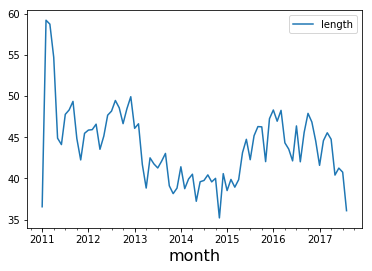

In [48]:
plt.figure()
comment_df_mean.plot(figsize=(6, 4))
plt.legend(loc='best')
plt.savefig('./fig/comment avg length.jpg')

### comments average length per month V num of comments per month: two lines in one figure

In [45]:
comment_num_df = comment_df.groupby(by='month').count()
comment_num_df

,comment_id,length,subreddit
month,,,
2011-01-01,58,58,58
2011-02-01,67,67,67
2011-03-01,392,392,392
2011-04-01,678,678,678
2011-05-01,5802,5802,5802
2011-06-01,24089,24089,24089
2011-07-01,6937,6937,6937
2011-08-01,5339,5339,5339
2011-09-01,4933,4933,4933


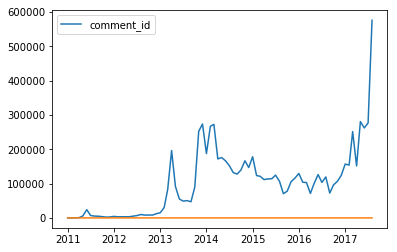

In [51]:
plt.figure(figsize=(6, 4))
# comment_num_df['comment_id'].plot(figsize=(6, 4))
plt.plot(comment_num_df['comment_id'])
plt.plot(comment_df_mean)
plt.legend(loc='best')
plt.savefig('./fig/num of comment.jpg')

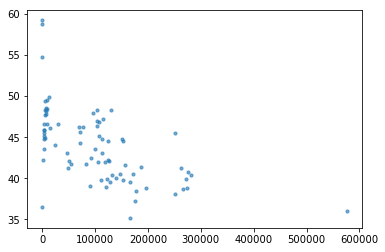

In [53]:
plt.scatter(comment_num_df['comment_id'], comment_df_mean, s=10, alpha=0.6)
plt.savefig('./fig/numVlen comment.jpg')

In [201]:
spearmanr(comment_num_df['comment_id'], comment_df_mean)

SpearmanrResult(correlation=-0.64875761837787149, pvalue=7.6387704492880466e-11)

### comment length per month per subreddit

In [55]:
comment_df_subr_month = comment_df.groupby(by=['subreddit', 'month']).mean()
comment_df_subr_month = comment_df_subr_month.reset_index()
# comment_df_subr_month

In [56]:
comment_df_subr_month = comment_df_subr_month.pivot(index='month', columns='subreddit', values='length')
comment_df_subr_month = comment_df_subr_month.fillna(0)
comment_df_subr_month

subreddit,Bitcoin,BitcoinMarkets,BlockChain,CryptoCurrency,CryptoMarkets,Monero,NEO,Ripple,btc
month,,,,,,,,,
2011-01-01,36.551724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-02-01,59.208955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-03-01,58.737245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-04-01,54.703540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-05-01,44.877973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-06-01,44.103616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07-01,47.773677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-01,48.312418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-09-01,49.350699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


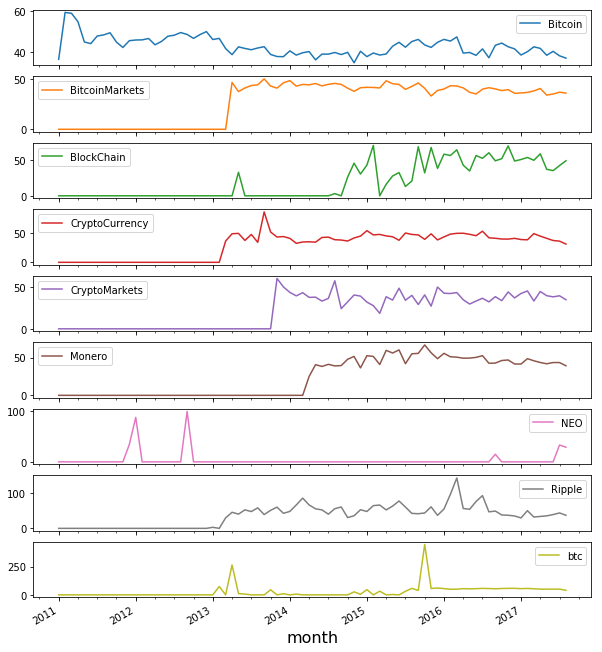

In [62]:
plt.figure()
comment_df_subr_month.plot(subplots=True, figsize=(10, 12))
plt.legend(loc='best')
plt.savefig('./fig/avg comment length per subreddit.jpg')

In [81]:
comment_df[comment_df['subreddit']=='NEO']

,comment_id,length,month,subreddit
2162,c3ap8q2,55,2011-12-01,NEO
2165,c3apc4o,54,2011-12-01,NEO
2175,c3aqt2r,22,2011-12-01,NEO
2182,c3aszyz,18,2011-12-01,NEO
2198,c3au7tw,109,2011-12-01,NEO
2233,c3ayleg,22,2011-12-01,NEO
2332,c3b4yxk,8,2011-12-01,NEO
2340,c3b6k0b,30,2011-12-01,NEO
2382,c3bcxzm,5,2011-12-01,NEO
2439,c3brljc,7,2011-12-01,NEO


### Relationship between comment length and number of comment per subreddit

Result:
No significant relationships
Bitcoin, BitcoinMarkets, BlockChain: length and number of comments are significantly corealated. Bitcoin has negative correlation.

In [57]:
len_num_comment_pcorrelation = {}
for col in subreddit_lst:
    len_num_comment_pcorrelation[col] = pearsonr(subr_comment_df[col], comment_df_subr_month[col])

In [58]:
len_num_comment_pcorrelation

{'Bitcoin': (-0.6798898149252286, 4.0605723840657534e-12),
 'BitcoinMarkets': (0.62991585881124035, 3.850142735104081e-10),
 'BlockChain': (0.51120166087325447, 1.2628025891057192e-06),
 'CryptoCurrency': (0.12700615213690933, 0.26158519809294645),
 'CryptoMarkets': (0.28423017559640207, 0.010614075031236115),
 'Monero': (0.45141830652068676, 2.6369793201709353e-05),
 'NEO': (0.19511150539234043, 0.082851490363630112),
 'Ripple': (0.026389072008917984, 0.81626097682990939),
 'btc': (0.18805306407336414, 0.09482739406815742)}

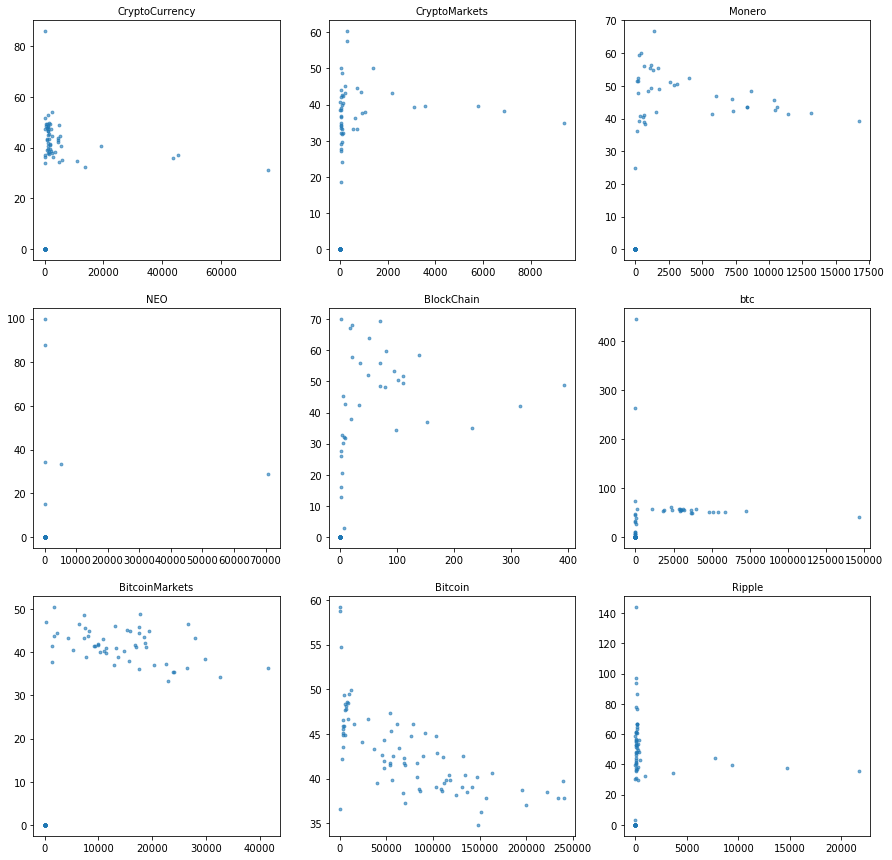

In [60]:
plt.figure(figsize=(15, 15))
plt.subplot(331)
plt.scatter(subr_comment_df['CryptoCurrency'], comment_df_subr_month['CryptoCurrency'],  s=8, alpha=0.6)
plt.title('CryptoCurrency')

plt.subplot(332)
plt.scatter(subr_comment_df['CryptoMarkets'], comment_df_subr_month['CryptoMarkets'], s=8, alpha=0.6)
plt.title('CryptoMarkets')

plt.subplot(333)
plt.scatter(subr_comment_df['Monero'], comment_df_subr_month['Monero'], s=8, alpha=0.6)
plt.title('Monero')

plt.subplot(334)
plt.scatter(subr_comment_df['NEO'], comment_df_subr_month['NEO'],  s=8, alpha=0.6)
plt.title('NEO')

plt.subplot(335)
plt.scatter(subr_comment_df['BlockChain'], comment_df_subr_month['BlockChain'],  s=8, alpha=0.6)
plt.title('BlockChain')

plt.subplot(336)
plt.scatter(subr_comment_df['btc'], comment_df_subr_month['btc'],  s=8, alpha=0.6)
plt.title('btc')

plt.subplot(337)
plt.scatter(subr_comment_df['BitcoinMarkets'], comment_df_subr_month['BitcoinMarkets'],  s=8, alpha=0.6)
plt.title('BitcoinMarkets')

plt.subplot(338)
plt.scatter(subr_comment_df['Bitcoin'], comment_df_subr_month['Bitcoin'],  s=8, alpha=0.6)
plt.title('Bitcoin')

plt.subplot(339)
plt.scatter(subr_comment_df['Ripple'], comment_df_subr_month['Ripple'], s=8, alpha=0.6)
plt.title('Ripple')

plt.savefig('./fig/numVlen comment - per subreddit.jpg')

In [187]:
comment_df_subr_month

subreddit,Bitcoin,BitcoinMarkets,BlockChain,CryptoCurrency,CryptoMarkets,Monero,NEO,Ripple,btc
month,,,,,,,,,
2011-01-01,36.551724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-02-01,59.208955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-03-01,58.737245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-04-01,54.703540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-05-01,44.877973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-06-01,44.103616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07-01,47.773677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-01,48.312418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-09-01,49.350699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 3. Threads analysis

In [63]:
thread_df = pd.read_csv(thread_data, sep='\t')
thread_df

,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,length,num_comment,num_user,thread_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,632,24,24,t3_1anmo2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,981,27,27,t3_1qhlky
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,39,2,2,t3_2l22o8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,22,2,2,t3_6r4ddd
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,1,1,t3_1d84ta
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,192,3,3,t3_23ki7a
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,40,6,6,t3_6s0mwu
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,730,21,21,t3_1l3c63
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,173,6,6,t3_4o3emh
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,695,24,24,t3_1q6fa9


In [65]:
thread_df['length'].describe()

count    465263.000000
mean        729.146160
std        2256.239152
min           0.000000
25%          47.000000
50%         167.000000
75%         524.000000
max      130940.000000
Name: length, dtype: float64

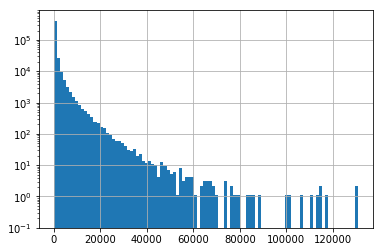

In [64]:
series = thread_df['length']
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
fig.savefig('./fig/thread_length')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a296ccc18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2cdaf908>]], dtype=object)

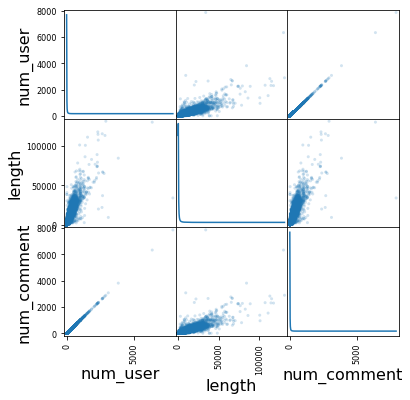

In [107]:
from pandas.plotting import scatter_matrix
scatter_matrix(thread_df[['num_user', 'length', 'num_comment']], alpha=0.2, figsize=(6, 6), diagonal='kde')

### Count how many months a thread appears

Only 6.48% of threads lasts more than one month.
For those last more than one month, number of months follows power law distribution. 

In [66]:
cols = thread_df.columns[:-4]
thread_df['num_month'] = thread_df[cols].gt(0).sum(axis=1)

In [67]:
over_months = thread_df[thread_df['num_month']>1]

In [70]:
thread_df[thread_df['num_month']>=3]['thread_id']

384       t3_4v96v1
402       t3_1g25gn
896       t3_273vi2
903       t3_6gzplo
944       t3_1tw5tn
1008      t3_2c2ou4
1262      t3_1wgb6t
1352      t3_1d0155
1645      t3_6cbpeq
1755      t3_1rpin1
1948      t3_2kmhk9
2175      t3_6cag6i
2208      t3_5r5xti
2237      t3_5wrdnq
2474      t3_54f69m
2616      t3_6bnql5
2782      t3_56m720
3141      t3_3cie8c
3142      t3_5r8pjo
3144      t3_5n78bg
3324      t3_21u2ez
3404      t3_2dlord
3529      t3_2nf3iw
3550      t3_6b6biu
3657      t3_5w4mtr
3816      t3_5md36r
3911      t3_1yvr8o
3956      t3_694nxm
4322      t3_3t34vd
4378      t3_6iqa7k
            ...    
462072    t3_56yp79
462176    t3_2puowt
462338    t3_4crhz9
462537    t3_5fkz77
462576    t3_1rdyqe
462700    t3_4zncqc
463103    t3_1f9lhb
463604    t3_62jswm
463668    t3_2f1uoh
463742    t3_3221tj
463874    t3_3cg465
463881    t3_5b0el1
463934    t3_64c610
463947    t3_18vdsx
463995    t3_2u642e
464056    t3_1elyuq
464135    t3_4fjwns
464154    t3_1lbqoo
464165    t3_1z6f07


In [71]:
3853/465263

0.008281337652037665

In [114]:
30128/465263

0.06475477310682345

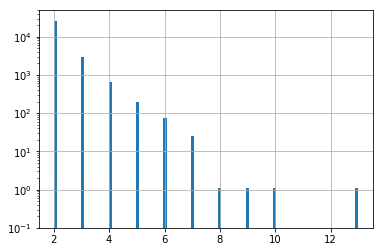

In [69]:
series = over_months['num_month']
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')   
fig.savefig('./fig/threads more than one month')

# What to do next:
1. re-collect thread data: use num_unique_users and subreddit attributes.
2. collect thread content of above long lasting threads
3. user analysis, looking forward to more interesting stuff

## 4. User data analysis

In [72]:
user_df = pd.read_csv(user_data, sep='\t')
user_df

,2011-01_num_comment,2011-01_num_subreddit,2011-01_num_thread,2011-02_num_comment,2011-02_num_subreddit,2011-02_num_thread,2011-03_num_comment,2011-03_num_subreddit,2011-03_num_thread,2011-04_num_comment,...,2017-06_num_comment,2017-06_num_subreddit,2017-06_num_thread,2017-07_num_comment,2017-07_num_subreddit,2017-07_num_thread,2017-08_num_comment,2017-08_num_subreddit,2017-08_num_thread,user_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AutoestopistaLunero
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,3,3,3,Dyran504
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,a7594li1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,roselan
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,1,0,0,0,narwi
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,poolteist
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,TheSnowite
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,rentahash
8,0,0,0,0,0,0,0,0,0,0,...,1,1,1,3,1,2,2,1,2,n3lz0n1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9,2,5,0,0,0,elken1313


### (1) Explore for each user,  what's the engagement pattern in subreddit 

In [73]:
cols = [c for c in user_df.columns if '_num_subreddit' in c]

user_subreddit_df = user_df[cols]

user_subreddit_df.columns = [c[:c.index('_')] for c in user_subreddit_df.columns]
# user_subreddit_df = user_subreddit_df.transpose()
# user_subreddit_df.columns = user_df['user_id']
user_subreddit_df.index = user_df['user_id']
# user_subreddit_df

### In each month, how many subreddit each user engage in average

In [74]:
user_subreddit_df = user_subreddit_df.replace(0, np.NaN)


In [75]:
user_subreddit_df.describe()

,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
count,24.0,33.0,107.0,153.0,699.0,2192.0,1059.0,912.0,808.0,675.0,...,9743.000000,10313.000000,13153.000000,11254.000000,14645.000000,11032.000000,22429.000000,26386.000000,25477.000000,41968.000000
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.226727,1.249394,1.254163,1.274658,1.361489,1.350616,1.328860,1.310695,1.330533,1.400782
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.527440,0.550985,0.570283,0.590818,0.687535,0.684324,0.715704,0.674361,0.702193,0.804396
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000,9.000000


### In each month, how many users are engaged in all subreddits

Huge bump on 2014, decline around 2015 to early 2017, and a rocket from mid 2017.

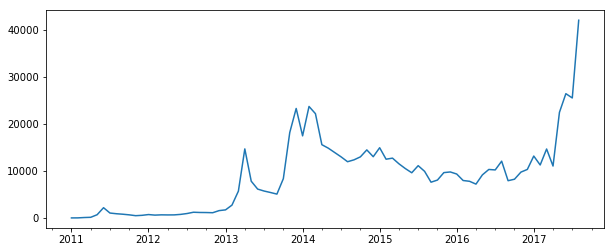

In [76]:
df = user_subreddit_df.count()
df.index = pd.to_datetime(df.index)
plt.figure()
df.plot(figsize=(10, 4), use_index=True)
# plt.legend(loc='best')
plt.savefig('./fig/num users')

### Number of comments v length of comments in avg

### In average, each user would engage in just one subreddit. But here are users crazily engage in more subreddits

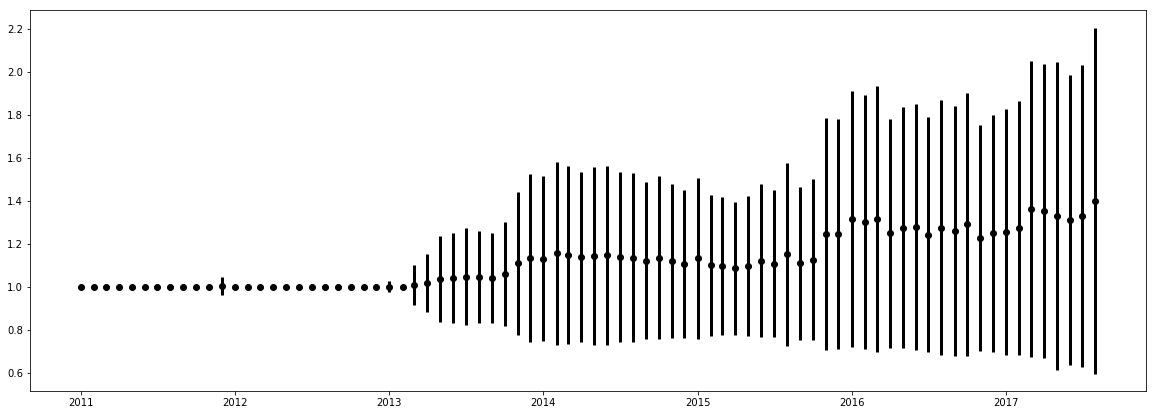

In [79]:
mins = user_subreddit_df.min()
maxes = user_subreddit_df.max()
means = user_subreddit_df.mean()
std = user_subreddit_df.std()

x = pd.to_datetime(user_subreddit_df.columns)
plt.figure(figsize=(20,7))
plt.errorbar(x, means, std, fmt='ok', lw=3)
plt.savefig('./fig/user_subreddit_errorbar_detail')

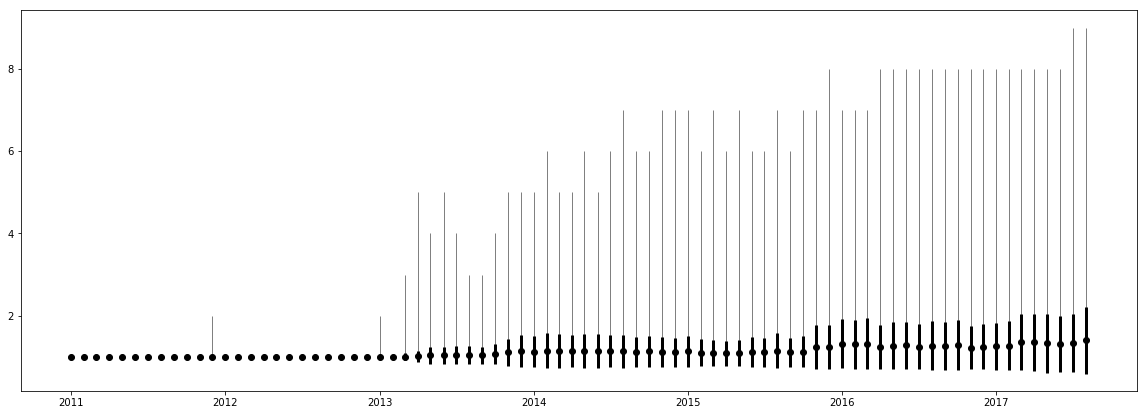

In [78]:
plt.figure(figsize=(20,7))
plt.errorbar(x, means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.errorbar(x, means, std, fmt='ok', lw=3)
plt.savefig('./user_subreddit_errorbar')

### (2) Explore for each user,  what's the engagement pattern in threads 
People would engage in less than 8 threads in average overtime, but, there are authors crazily posting over thousands per months. We would dive in later to see what are those people. (They may not be ordinary people, they should be organizations or chatting bots) (This should also be a threshold for filtering users in user networks)

In [81]:
cols = [c for c in user_df.columns if '_num_thread' in c]

user_thread_df = user_df[cols]

user_thread_df.columns = [c[:c.index('_')] for c in user_thread_df.columns]
user_thread_df.index = user_df['user_id']
# user_thread_df

In [82]:
user_thread_df = user_thread_df.replace(0, np.NaN)
user_thread_df.describe()



,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
count,24.000000,33.000000,107.000000,153.000000,699.000000,2192.000000,1059.000000,912.000000,808.000000,675.000000,...,9743.000000,10313.000000,13153.000000,11254.000000,14645.000000,11032.000000,22429.000000,26386.000000,25477.000000,41968.000000
mean,1.750000,1.787879,2.149533,2.418301,4.553648,6.002737,3.620397,3.346491,3.250000,3.074074,...,5.744740,6.359061,6.427355,7.025324,8.764493,7.299311,6.816844,5.606799,6.032461,7.530928
std,1.151558,1.556390,3.005667,3.933015,13.037566,25.020466,11.789882,10.000687,9.804375,9.524472,...,25.967788,30.744286,35.738474,35.932485,49.561095,37.791535,43.418858,39.769853,45.603463,69.827108
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.000000,2.000000,3.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,7.000000,28.000000,43.000000,302.000000,1023.000000,342.000000,267.000000,237.000000,216.000000,...,2025.000000,2607.000000,3626.000000,3306.000000,5180.000000,3430.000000,5796.000000,5897.000000,6677.000000,13390.000000


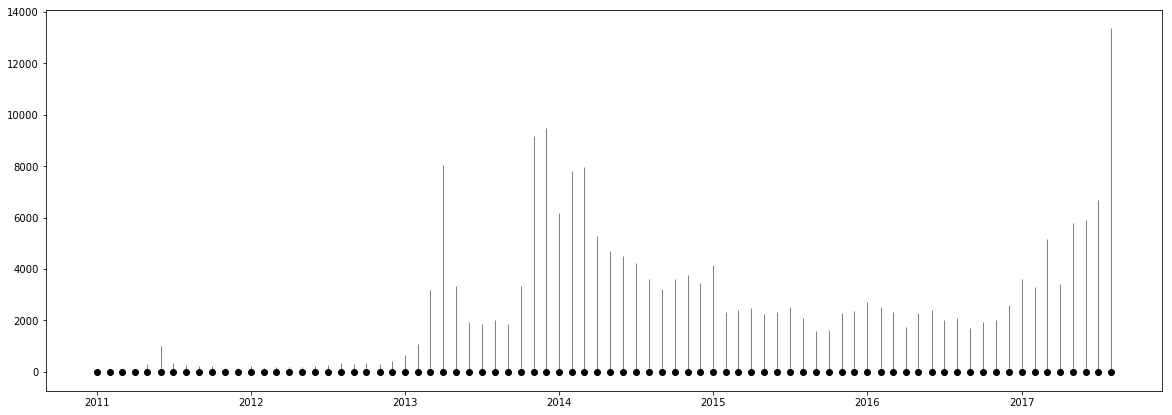

In [85]:
mins = user_thread_df.min()
maxes = user_thread_df.max()
means = user_thread_df.mean()
std = user_thread_df.std()

x = pd.to_datetime(user_thread_df.columns)
plt.figure(figsize=(20,7))
plt.errorbar(x, means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.errorbar(x, means, std, fmt='ok', lw=3)
plt.savefig('./fig/user thread')

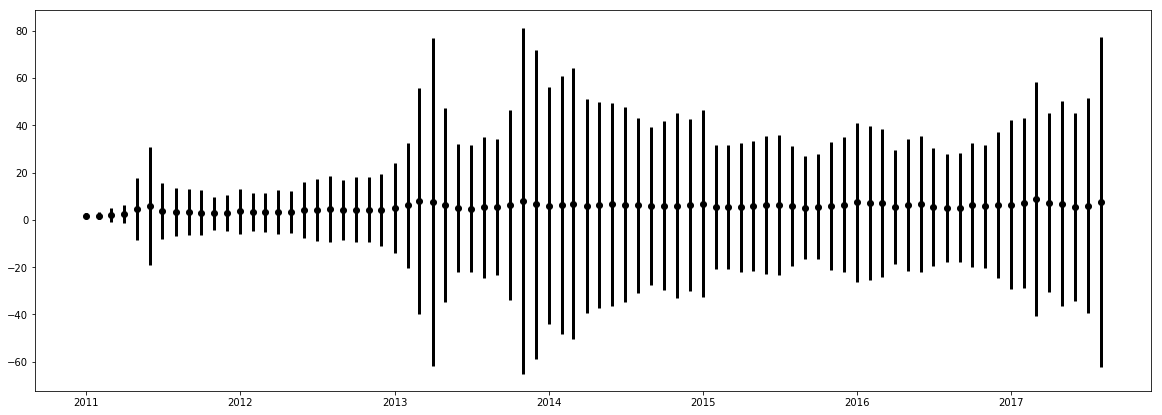

In [86]:
plt.figure(figsize=(20,7))
plt.errorbar(x, means, std, fmt='ok', lw=3)
plt.savefig('./fig/user thread detail')

In [171]:
means

2011-01    1.750000
2011-02    1.787879
2011-03    2.149533
2011-04    2.418301
2011-05    4.553648
2011-06    6.002737
2011-07    3.620397
2011-08    3.346491
2011-09    3.250000
2011-10    3.074074
2011-11    2.785141
2011-12    2.958188
2012-01    3.603261
2012-02    3.168013
2012-03    3.168639
2012-04    3.275076
2012-05    3.202096
2012-06    4.159533
2012-07    4.243979
2012-08    4.615635
2012-09    4.193548
2012-10    4.312446
2012-11    4.348135
2012-12    4.220457
2013-01    5.027152
2013-02    6.143118
2013-03    8.099737
2013-04    7.547760
2013-05    6.203609
2013-06    5.076685
             ...   
2015-03    5.515383
2015-04    5.401876
2015-05    5.877084
2015-06    6.383134
2015-07    6.313203
2015-08    5.909733
2015-09    5.205051
2015-10    5.529419
2015-11    5.992321
2015-12    6.417349
2016-01    7.507979
2016-02    7.073590
2016-03    7.149859
2016-04    5.550028
2016-05    6.105798
2016-06    6.540126
2016-07    5.523810
2016-08    5.069226
2016-09    5.210732


### (3) Explore for each user,  what's the engagement pattern in comments

In [87]:
cols = [c for c in user_df.columns if '_num_thread' in c]

user_comment_df = user_df[cols]

user_comment_df.columns = [c[:c.index('_')] for c in user_comment_df.columns]
user_comment_df.index = user_df['user_id']
user_comment_df = user_thread_df.replace(0, np.NaN)

user_comment_df

,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
user_id,,,,,,,,,,,,,,,,,,,,,
AutoestopistaLunero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Dyran504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,3.0
a7594li1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN
roselan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
narwi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
poolteist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
TheSnowite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
rentahash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n3lz0n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,3.0,1.0,5.0,1.0,4.0,1.0,2.0,2.0


In [88]:
user_comment_df.describe()

,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
count,24.000000,33.000000,107.000000,153.000000,699.000000,2192.000000,1059.000000,912.000000,808.000000,675.000000,...,9743.000000,10313.000000,13153.000000,11254.000000,14645.000000,11032.000000,22429.000000,26386.000000,25477.000000,41968.000000
mean,1.750000,1.787879,2.149533,2.418301,4.553648,6.002737,3.620397,3.346491,3.250000,3.074074,...,5.744740,6.359061,6.427355,7.025324,8.764493,7.299311,6.816844,5.606799,6.032461,7.530928
std,1.151558,1.556390,3.005667,3.933015,13.037566,25.020466,11.789882,10.000687,9.804375,9.524472,...,25.967788,30.744286,35.738474,35.932485,49.561095,37.791535,43.418858,39.769853,45.603463,69.827108
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.000000,2.000000,3.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,7.000000,28.000000,43.000000,302.000000,1023.000000,342.000000,267.000000,237.000000,216.000000,...,2025.000000,2607.000000,3626.000000,3306.000000,5180.000000,3430.000000,5796.000000,5897.000000,6677.000000,13390.000000


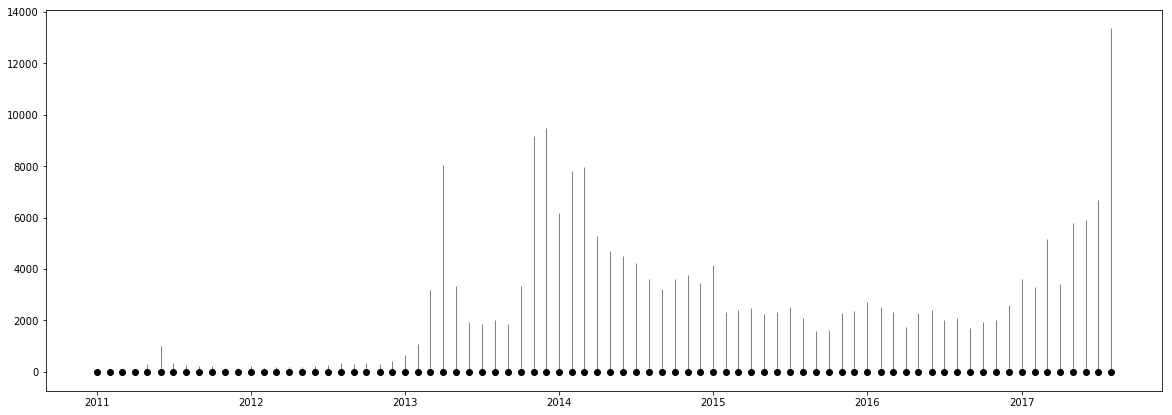

In [89]:
mins = user_comment_df.min()
maxes = user_comment_df.max()
means = user_comment_df.mean()
std = user_comment_df.std()

x = pd.to_datetime(user_comment_df.columns)
plt.figure(figsize=(20,7))
plt.errorbar(x, means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.errorbar(x, means, std, fmt='ok', lw=3)
plt.savefig('./fig/user comment')


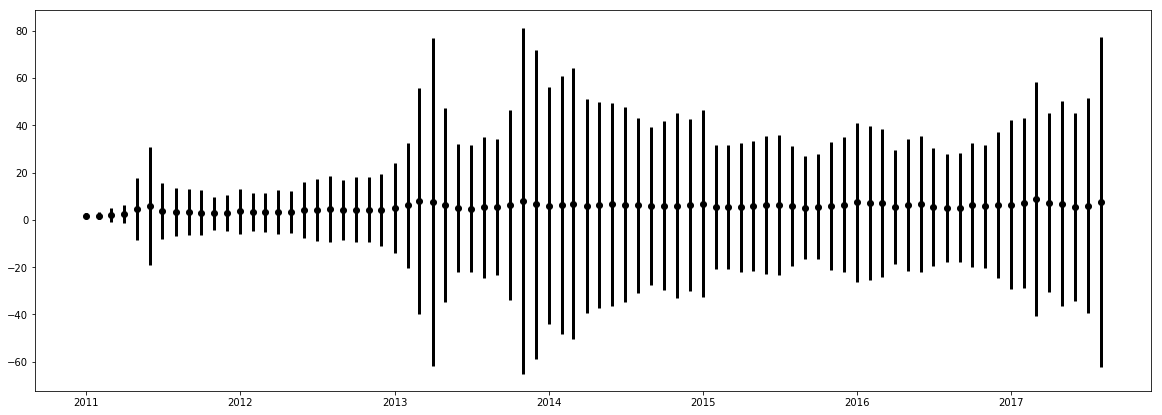

In [90]:
plt.figure(figsize=(20,7))
plt.errorbar(x, means, std, fmt='ok', lw=3)
plt.savefig('./fig/user comment detail')

### (4) Explore the relationship between comments and threads

In [91]:
user_comment_per_subreddit = user_comment_df.divide(user_subreddit_df, axis='columns')
# user_comment_per_thread


In [92]:
user_comment_per_subreddit.describe()

,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
count,24.000000,33.000000,107.000000,153.000000,699.000000,2192.000000,1059.000000,912.000000,808.000000,675.000000,...,9743.000000,10313.000000,13153.000000,11254.000000,14645.000000,11032.000000,22429.000000,26386.000000,25477.000000,41968.000000
mean,1.750000,1.787879,2.149533,2.418301,4.553648,6.002737,3.620397,3.346491,3.250000,3.074074,...,3.722343,4.161777,4.169297,4.427024,4.982493,4.327569,4.117070,3.521206,3.625510,4.102539
std,1.151558,1.556390,3.005667,3.933015,13.037566,25.020466,11.789882,10.000687,9.804375,9.524472,...,9.598346,10.412400,10.761909,11.200849,14.399795,11.452792,12.123895,10.436470,11.475000,13.958108
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.250000,2.000000,2.000000,3.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.500000,3.500000,3.000000,3.000000,3.000000,3.000000,3.000000
max,5.000000,7.000000,28.000000,43.000000,302.000000,1023.000000,342.000000,267.000000,237.000000,216.000000,...,289.000000,361.500000,453.250000,453.000000,647.500000,428.750000,724.500000,737.125000,741.888889,1487.777778


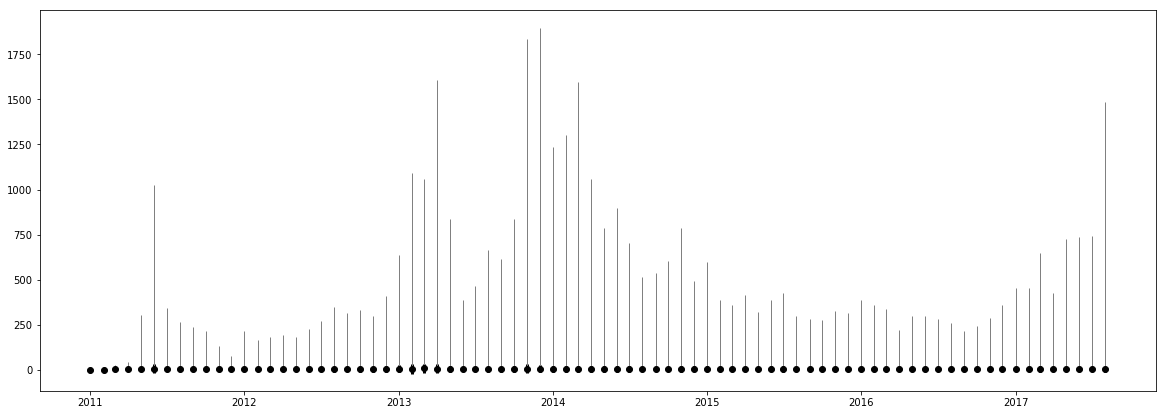

In [95]:
mins = user_comment_per_subreddit.min()
maxes = user_comment_per_subreddit.max()
means = user_comment_per_subreddit.mean()
std = user_comment_per_subreddit.std()

x = pd.to_datetime(user_comment_per_subreddit.columns)
plt.figure(figsize=(20,7))
plt.errorbar(x, means, std, fmt='ok', lw=3)
plt.errorbar(x, means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.savefig('./fig/num of comments per subreddit')

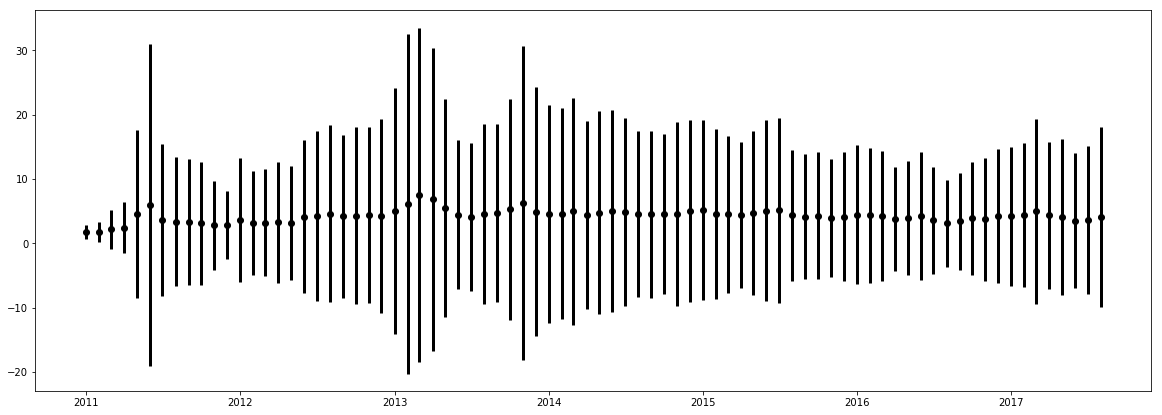

In [96]:
plt.figure(figsize=(20,7))
plt.errorbar(x, means, std, fmt='ok', lw=3)
plt.savefig('./fig/num of comments per subreddit detail')

# What to do next:
1. 研究一下user的comment和thread为什么data看起来一样：看code: Hmm 看起来确实是一样的，code应该是没有问题的

2. 补上讨论时候觉得缺少的部分: see above

3. 确定thread_df是不是确实有必要重新计算: 有必要

4. 确定filter user的策略: 需要计算user engage #threads, #comments, #subreddit在不同scale下的比例

5. review Lada's paper